In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ursse.hydra_harp_file_reader import HydraHarpFile
from ursse.path_assistant import PathAssistant as pa
import ursse.path_assistant
import statsmodels.api as sm
import valstore as vt
import os
shift = pa("tests_11_14_2019")

In [2]:
df = pd.read_csv(os.path.join(shift.shift_dir, "RefCurve_2019-10-31_0_134552.Wfm.csv"), header=None, nrows=10000)
df = df.iloc[:,0].apply(lambda x: pd.Series([float(y) for y in x.split(";")]))

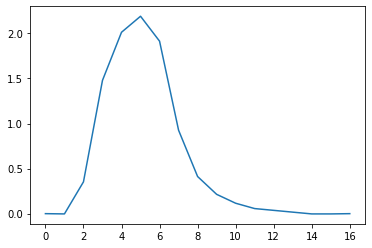

In [3]:
y = df.loc[4390:4404,0].values
y = np.array([0]+list(y)+[0])
plt.plot(y)

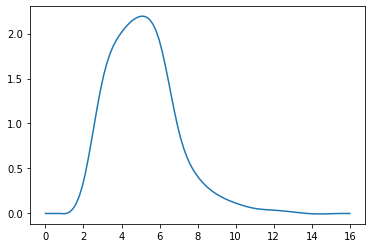

In [4]:
from scipy.interpolate import interp1d
x0 = np.arange(len(y))
f = interp1d(x0, y, kind='cubic')
x = np.linspace(0, max(x0), 100)
y = f(x)
for i in range(6):
    y[i] = 0
for i in range(5):
    y[-i] = 0

plt.plot(x, y)

In [5]:
# full_path = os.path.join(shift.shift_dir, "RefCurve_2019-11-14_0_160113.Wfm.bin")
# data = np.fromfile(full_path,dtype=np.float32)
# ch1 = data[::2][1:]
# ch2 = data[1::2][1:]
# plt.plot(ch1[100000-450:100000-400])

In [6]:
# scale=0.5
# plt.rcParams["text.usetex"] =True
# plt.rc('text.latex', preamble=r'\usepackage{siunitx}')
# plt.rcParams['figure.figsize'] = [scale*25, scale*7.5]


# d = 0

# halfmax = max(y)/2
# for i,z in enumerate(y):
#     if i>0:
#         if (z>halfmax) and (y[i-1]<=halfmax):
#             left_pos = i-d
#         if (z<halfmax) and (y[i-1]>=halfmax):
#             right_pos = i+d

# plt.plot(y, linewidth=scale*12)
# arrowstyle = '<->'
# ddd = 0
# plt.annotate(s="", xy=(left+ddd, halfmax),
#                  xytext=(right-ddd, halfmax),
#                  arrowprops=dict(
#                      arrowstyle=arrowstyle,
#                      linewidth=scale*12))


# # for i,wf in enumerate(wfs_filtered):
# #     halfmax = max(wf)/2
# #     left, right = left_pos[i], right_pos[i]
# #     plt.plot(wf, linewidth=scale*12)
# #     plt.xlim(0,len(wf))
# #     arrowstyle = '-' if i==0 else '<->'
# #     ddd = 5 if i==0 else 0
# #     plt.annotate(s="", xy=(left+ddd, halfmax),
# #                  xytext=(right-ddd, halfmax),
# #                  arrowprops=dict(
# #                      arrowstyle=arrowstyle,
# #                      linewidth=scale*12))
# #     dt0 = per*1e9/len(wf)
# #     plt.annotate(s=r"\SI{"+f"{(right-left-2*d)*dt0:.1f}" + r"}{ns}",xy=(right+10, halfmax),
# #                 fontsize=scale*120)
# #     plt.axis('off')
# # #     plt.savefig(os.path.join(prl_images,
# # #                              "integrator_and_comb_filter"
# # #                              ,names[i]),
# # #             dpi=300, bbox_inches='tight', facevolor='white')
# #     plt.show()

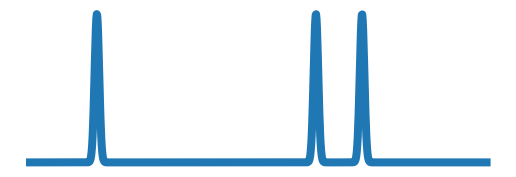

In [22]:
x = np.linspace(-4-20, 170+4, 1000)
y = np.sum([np.exp(-(x-mu)**2/2) for mu in [5, 100, 120]], axis=0)
fig, ax = plt.subplots(figsize=(9, 3))
plt.plot(x, y, linewidth=8)
# plt.xlim(-50,50)
plt.axis('off')
fig.savefig(os.path.join(ursse.path_assistant.data_folder,
                         "for_publications", "jinst",
                         "spad_pulses.png"),
            dpi=300, bbox_inches='tight')
plt.show()